## <center>EE798Q FISA: Assignment 1</center>

### <div style="text-align: right">Name: Prajeeth Babu Kodru</div>
### <div style="text-align: right">Roll no: 22104071</div>

Importing necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from scipy.signal import find_peaks
import scipy.stats as stats
import random
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('Open pit blasting 01-02-2023 000000 To 01-05-2023 235959.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df = df.drop(df.index[-3:]) #dropping the last 3 rows 

Plotting the timeseries

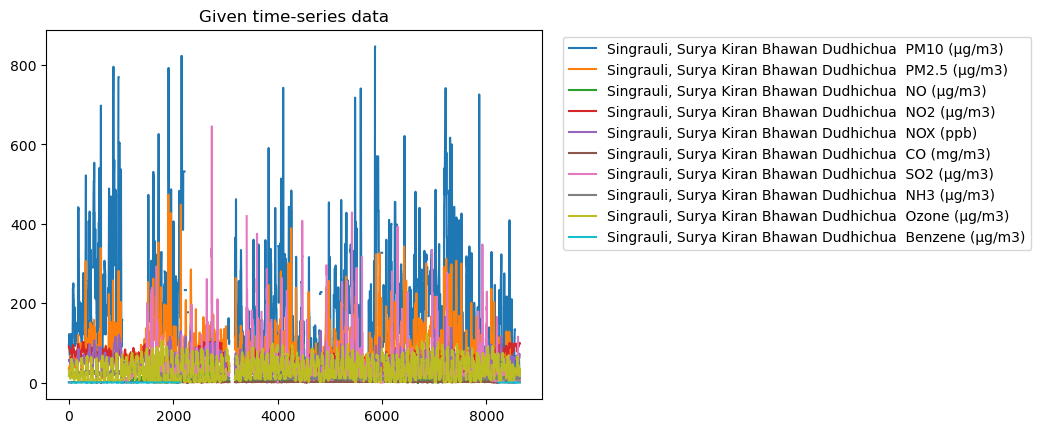

In [3]:
legend = df.plot().legend(loc='upper right', bbox_to_anchor=(2, 1))
plt.title("Given time-series data")
plt.show()

We can see that data is missing around the index 3000. We can replace the NA values with 0 but that will not capture the trend of data properly. Instead, we can use interpolation to fill the missing data which can capture the trend better. The presence of NA (missing) values in the data can pose challenges when using ARIMA models. ARIMA models typically require a complete and continuous time series without missing values. ARIMA should be applied on per-column basis because each column represents time-series.

#### <center>Interpolation</center>

Spline interpolation of order 3 is used to interpolate the missing values.

In [4]:
df_interpolate = df.interpolate(method='spline',order=3)

Since the interpolation method does not interpolate the missing data values during the start and end, the missing data is replaced with mean value

In [5]:
df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)"]=df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)"].fillna(14.65)
df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)"]=df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)"].fillna(34.23)

In [6]:
datetime_columns = ['From', 'To (Interval: 15M)']  # Add your datetime column names here
numeric_columns = ['Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  NO (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  NO2 (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)','Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)','Singrauli, Surya Kiran Bhawan Dudhichua  Benzene (µg/m3)']
df_interpolate['From'] = pd.to_datetime(df_interpolate['From'])
df_interpolate['To (Interval: 15M)'] = pd.to_datetime(df_interpolate['To (Interval: 15M)'])

The peak values are clipped to max and min values of the dataset to preserve the data's trend.

In [7]:
df_interpolate[numeric_columns] = df_interpolate[numeric_columns].clip(lower=0.1,upper=847)

The missing data is interpolated 

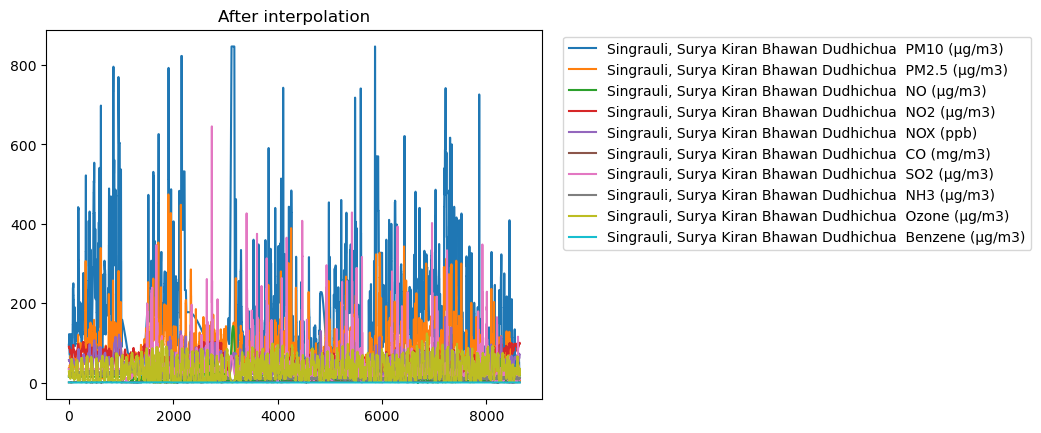

In [8]:
legend = df_interpolate[numeric_columns].plot().legend(loc='upper right', bbox_to_anchor=(2, 1))
plt.title("After interpolation")
plt.show()

##### ACF and PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
pacf=plot_pacf(df_mean,lags=25)
acf=plot_acf(df_mean,lags=25)

##### Implementing ARIMA for PM10, PM2.5

Check for stationarity 

In [9]:
from statsmodels.tsa.stattools import adfuller
dftest10 = adfuller(df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)"], autolag = 'AIC')
dftest25 = adfuller(df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)"], autolag = 'AIC')
print("P-Value for PM10 = ",dftest10[1])
print("P-Value for PM 2.5 = ",dftest25[1])

P-Value for PM10 =  2.2455465301090405e-12
P-Value for PM 2.5 =  3.491569870232401e-20


Since the p-value is low, it can be concluded that the data is stationary 

In [10]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

<center>Implementing for PM10</center>

In [11]:
stepwise_fit = auto_arima(df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)"],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=88509.733, Time=2.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=88636.517, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=88636.448, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=88636.470, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=88634.517, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=88640.186, Time=0.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=88507.678, Time=3.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=88545.541, Time=2.20 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=88594.130, Time=3.62 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=88506.955, Time=3.92 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.64 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=4.11 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=8

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8640
Model:               SARIMAX(2, 1, 5)   Log Likelihood              -44163.209
Date:                Tue, 27 Jun 2023   AIC                          88342.418
Time:                        23:16:20   BIC                          88398.931
Sample:                             0   HQIC                         88361.687
                               - 8640                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0317      0.007     -4.718      0.000      -0.045      -0.019
ar.L2          0.8893      0.004    238.988      0.000       0.882       0.897
ma.L1          0.0362      0.019      1.890      0.059      -0.001       0.074
ma.L2         -0.9132      0.023    -40.010      0.000      -0.958      -0.868
ma.L3         -0.0103      0.043     -0.238      0.812      -0.095       0.075
ma.L4         -0.0653      0.023     -2.894      0.004      -0.109      -0.021
ma.L5         -0.0244      0.036     -0.675      0.500      -0.095       0.046
sigma2      1613.3281      5.177    311.624      0.000    1603.181    1623.475
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1823743.48
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             1.66
Prob(H) (two-sided):                  0.12   Kurtosis:                        74.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
from statsmodels.tsa.arima.model import ARIMA

In [13]:
print(df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)"].shape)
train = df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)"].iloc[:-96*3]
test = df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)"].iloc[-96*3:]
print(train.shape,test.shape)

(8640,)
(8352,) (288,)


In [14]:
model_pm10 = ARIMA(train, order=(2,1,5))
model_pm10 = model_pm10.fit()
model_pm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 SARIMAX Results                                                 
=================================================================================================================
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)   No. Observations:                 8352
Model:                                                    ARIMA(2, 1, 5)   Log Likelihood              -42754.959
Date:                                                   Tue, 27 Jun 2023   AIC                          85525.918
Time:                                                           23:16:57   BIC                          85582.159
Sample:                                                                0   HQIC                         85545.127
                                                                  - 8352                                         
Covariance Type:                                                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0298      0.007     -4.408      0.000      -0.043      -0.017
ar.L2          0.8909      0.004    236.198      0.000       0.884       0.898
ma.L1          0.0346      0.019      1.791      0.073      -0.003       0.072
ma.L2         -0.9135      0.023    -39.406      0.000      -0.959      -0.868
ma.L3         -0.0103      0.044     -0.232      0.817      -0.097       0.077
ma.L4         -0.0653      0.023     -2.850      0.004      -0.110      -0.020
ma.L5         -0.0237      0.037     -0.642      0.521      -0.096       0.049
sigma2      1630.3558      5.313    306.843      0.000    1619.942    1640.770
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1756481.96
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                             1.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        73.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

All data except the data from last three days is taken for training and the data obtained by predicting from trained model is compared with the original data for last three days 

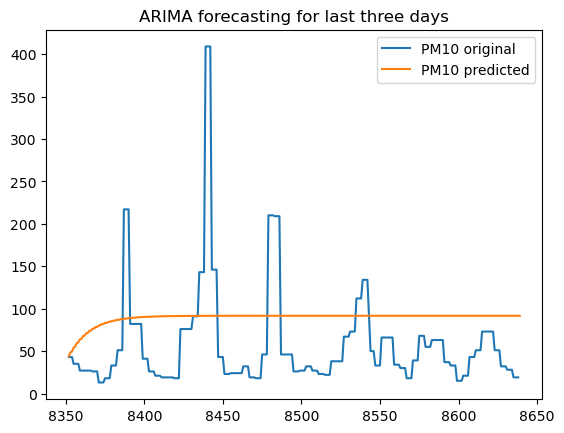

In [15]:
start = len(train)
end = len(train)+len(test)-1
pred_pm10 = model_pm10.predict(start=start,end=end,typ='levels')
plt.title("ARIMA forecasting for last three days")
plt.plot(df_interpolate[start:end]["Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)"], label='PM10 original')
plt.plot(pred_pm10, label='PM10 predicted')
plt.legend()
plt.show()


 <center>Implementing for PM2.5</center>

In [16]:
stepwise_fit = auto_arima(df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)"],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=76566.874, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=76568.870, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=76568.871, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=76564.874, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.889 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8640
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -38281.437
Date:                Tue, 27 Jun 2023   AIC                          76564.874
Time:                        23:17:20   BIC                          76571.938
Sample:                             0   HQIC                         76567.283
                               - 8640                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       413.4253      1.022    404.642      0.000     411.423     415.428
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1960417.29
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        76.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
print(df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)"].shape)
train = df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)"].iloc[:-96*3]
test = df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)"].iloc[-96*3:]
print(train.shape,test.shape)

(8640,)
(8352,) (288,)


In [18]:
model_pm25 = ARIMA(train, order=(0,1,0))
model_pm25 = model_pm25.fit()
model_pm25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 SARIMAX Results                                                  
==================================================================================================================
Dep. Variable:     Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)   No. Observations:                 8352
Model:                                                     ARIMA(0, 1, 0)   Log Likelihood              -37092.136
Date:                                                    Tue, 27 Jun 2023   AIC                          74186.271
Time:                                                            23:17:28   BIC                          74193.302
Sample:                                                                 0   HQIC                         74188.673
                                                                   - 8352                                         
Covariance Type:                                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       422.1173      1.067    395.625      0.000     420.026     424.208
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1852073.31
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        75.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

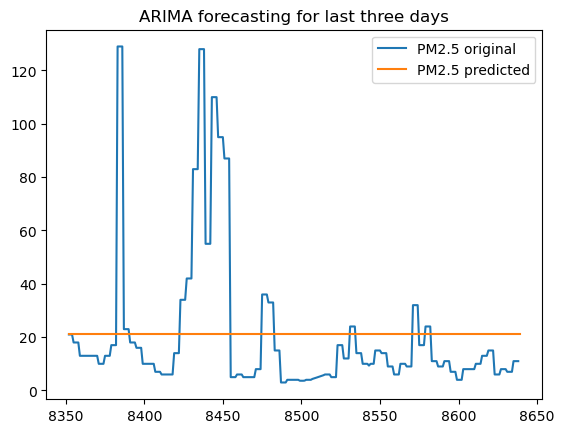

In [19]:
start = len(train)
end = len(train)+len(test)-1
pred_pm25 = model_pm25.predict(start=start,end=end,typ='levels')
plt.title("ARIMA forecasting for last three days")
plt.plot(df_interpolate[start:end]["Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)"], label='PM2.5 original')
plt.plot(pred_pm25, label='PM2.5 predicted')
plt.legend()
plt.show()

#### Interpolation vs ARIMA which is better to fill missing values?

ARIMA prediction gives just a line whereas spline interpolation gives a curve which captures the trend of data better. So, spline interpolation is used to process data.

### Combining air pollution factors to obtain a single time-series data

"rolling_data" is used to capture the rolling mean to calculate Air Quality Index(AQI). In real world, the effect of air pollution is captured by using AQI. The sub-index for all the pollutants are generated by observing the concentration of pollutants and their accepted range of concentrations. Maximum value of all sub-indexes are used to calculate AQI.
The details of accepted pollutant concentration ranges and AQI calculation can be found in World Health Organisation website. https://www.who.int/publications/i/item/9789240034228

In [20]:
rolling_data = df_interpolate
#hr_24 = 24*4
#hr_8 = 8*4
#hr_1 = 4
interval=1

In [21]:
rolling_data["Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)"] = df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)"].rolling(window = interval, min_periods = 1).mean().values
rolling_data["Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)"] = df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)"].rolling(window = interval, min_periods = 1).mean().values
rolling_data["Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)"] = df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)"].rolling(window = interval, min_periods = 1).mean().values
rolling_data["Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)"] = df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)"].rolling(window = interval, min_periods = 1).mean().values
rolling_data["Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)"] = df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)"].rolling(window = interval, min_periods = 1).mean().values
rolling_data["Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)"] = df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)"].rolling(window = interval, min_periods = 1).max().values
rolling_data["Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)"] = df_interpolate["Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)"].rolling(window = interval, min_periods = 1).max().values

##### AQI calculation

In [22]:
QI_PM25=[0]*rolling_data.shape[0]
QI_PM10=[0]*rolling_data.shape[0]
QI_SO2=[0]*rolling_data.shape[0]
QI_NOx=[0]*rolling_data.shape[0]
QI_NH3=[0]*rolling_data.shape[0]
QI_CO=[0]*rolling_data.shape[0]
QI_O3=[0]*rolling_data.shape[0]
AQI=[0]*rolling_data.shape[0]

In [23]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

QI_PM25 = rolling_data["Singrauli, Surya Kiran Bhawan Dudhichua  PM2.5 (µg/m3)"].apply(lambda x: get_PM25_subindex(x))

## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

QI_PM10 = rolling_data["Singrauli, Surya Kiran Bhawan Dudhichua  PM10 (µg/m3)"].apply(lambda x: get_PM10_subindex(x))

## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

QI_SO2 = rolling_data["Singrauli, Surya Kiran Bhawan Dudhichua  SO2 (µg/m3)"].apply(lambda x: get_SO2_subindex(x))

## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

QI_NOx = rolling_data["Singrauli, Surya Kiran Bhawan Dudhichua  NOX (ppb)"].apply(lambda x: get_NOx_subindex(x))

## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

QI_NH3 = rolling_data["Singrauli, Surya Kiran Bhawan Dudhichua  NH3 (µg/m3)"].apply(lambda x: get_NH3_subindex(x))

## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

QI_CO = rolling_data["Singrauli, Surya Kiran Bhawan Dudhichua  CO (mg/m3)"].apply(lambda x: get_CO_subindex(x))

## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

QI_O3 = rolling_data["Singrauli, Surya Kiran Bhawan Dudhichua  Ozone (µg/m3)"].apply(lambda x: get_O3_subindex(x))

AQI = np.maximum.reduce([QI_PM25, QI_PM10, QI_SO2, QI_NOx, QI_NH3, QI_CO, QI_O3])

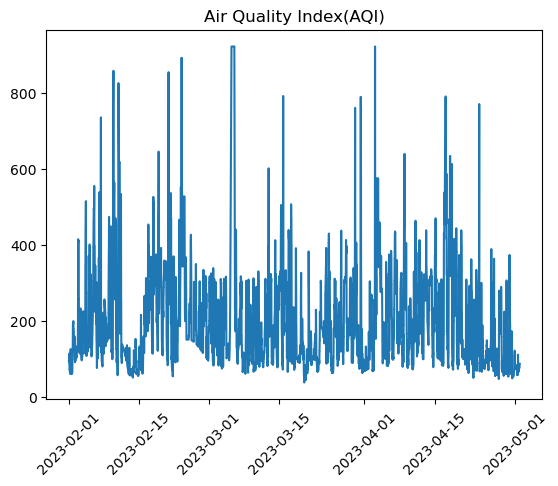

In [24]:
AQI_df = pd.DataFrame(AQI, columns=['AQI'])
AQI_df['Date-time'] = df['From']
AQI_df = AQI_df[['Date-time','AQI']]
AQI_df['Date-time'] = pd.to_datetime(AQI_df['Date-time'])
AQI_df.set_index('Date-time', inplace=True)
plt.title("Air Quality Index(AQI)")
plt.plot(AQI_df)
plt.xticks(rotation=45)
plt.show()

### <center>Calculating blasting time</center>

#### Assuming blasting time is strictly between 13:45pm to 14:45pm

In [25]:
blast_times = []
time=[56,57]
times_freq=[]
for i in range(90):
    f=0
    if AQI[i*96+55]==AQI[i*96+56] and AQI[i*96+56]==AQI[i*96+57] and AQI[i*96+57]==AQI[i*96+58]:
        #if all data between 13:45 and 14:45 are equal, then blast time is assigned to random time 
        blast_times.append(i*96+random.choice(time))
    else:
        #Blasting time is calculated as minimum value of AQI within 13:45 and 14:45
        minval = min(AQI[i*96+55:i*96+59])
        for j in range(i*96+55,i*96+59):
            if AQI[j] == minval and f==0:
                f=1
                blast_times.append(j)

for i in range(90):
    blast_times[i] = blast_times[i]-96*i

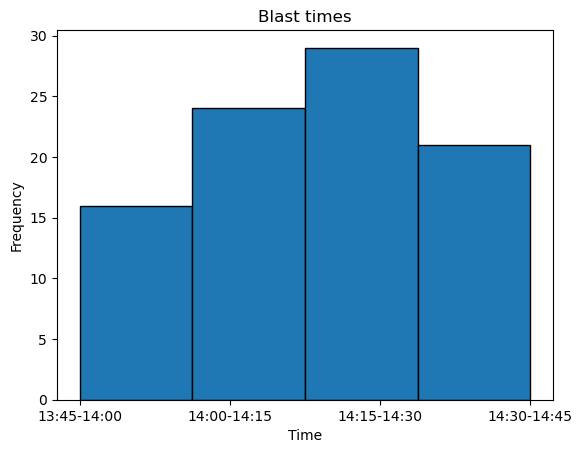

Probability of blast happening between 14:15 to 14:30 =  32.22222222222222  percent


In [26]:
hist, bins = np.histogram(blast_times, bins=4)

plt.hist(blast_times, bins=4, edgecolor='black')
x_ticks = [55, 56, 57, 58]
x_labels = ['13:45-14:00', '14:00-14:15', '14:15-14:30', '14:30-14:45']
plt.xticks(x_ticks, x_labels)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Blast times')
plt.show()

print("Probability of blast happening between 14:15 to 14:30 = ",(hist[2]/90)*100," percent")

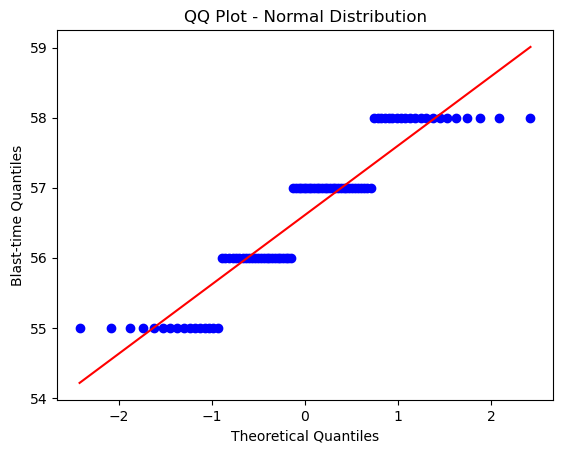

In [27]:
stats.probplot(blast_times, dist="norm", plot=plt)
plt.title("QQ Plot - Normal Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Blast-time Quantiles")
plt.show()

#### Assuming blast can happen anytime between 10:00 am and 7:00pm. It is also assumed that there can be multiple blasts on a same day.

In [28]:
threshold = 110  # Minimum height of the peak to consider it as a blast
min_distance = 1 # Minimum distance between peaks

# Empty list to store the peak entry for each day
peak_entries = []

# Iterate over each day
for i in range(90):
    start_index = i * 96  # Starting index of the day
    end_index = (i + 1) * 96  # Ending index of the day

    # Extract the AQI values for the current day
    day_data = AQI[start_index:end_index]

    # Find peaks in the day data
    peaks, _ = find_peaks(day_data, height=threshold, distance=min_distance)

    # Filter peaks to exclude entries near the start or end of the day
    filtered_peaks = [peak for peak in peaks if 43 < peak < 72]

    # Get the peak entry for the day (if available)
    if filtered_peaks:
        peak_entry = filtered_peaks[0] + start_index
        for j in range(len(filtered_peaks)):
            peak_entries.append(filtered_peaks[j] + start_index)
    else:
        peak_entry = None
        peak_entries.append(peak_entry)

# Plot the AQI data
#plt.plot(AQI)
#plt.xlabel('Time')
#plt.ylabel('AQI')

# Mark the peak entries on the plot
#for entry in peak_entries:
#    if entry is not None:
#        plt.plot(entry, AQI[entry], 'ro')

#plt.show()
#print((peak_entries))

In [29]:
for i in range(len(peak_entries)):
    if peak_entries[i]==None:
        peak_entries[i]=random.randint(55,59)
    else:
        peak_entries[i]=peak_entries[i]%96

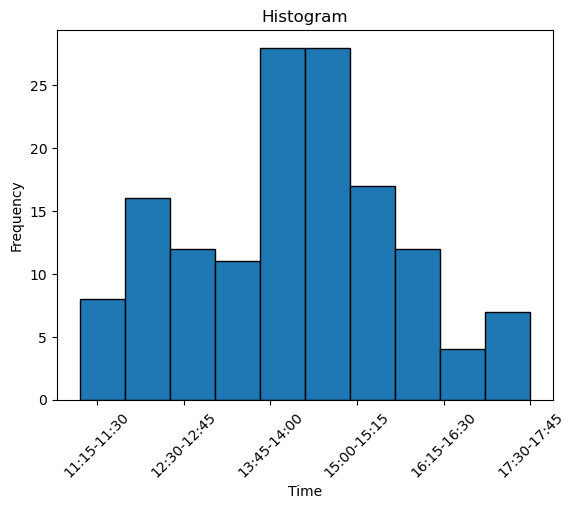

In [30]:
#Plotting histogram
plt.hist(peak_entries, bins=10, edgecolor='black')
x_ticks = [45, 50, 55, 60, 65, 70]
x_labels = ['11:15-11:30', '12:30-12:45', '13:45-14:00', '15:00-15:15','16:15-16:30', '17:30-17:45']
plt.xticks(x_ticks, x_labels)
plt.xticks(rotation=45)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

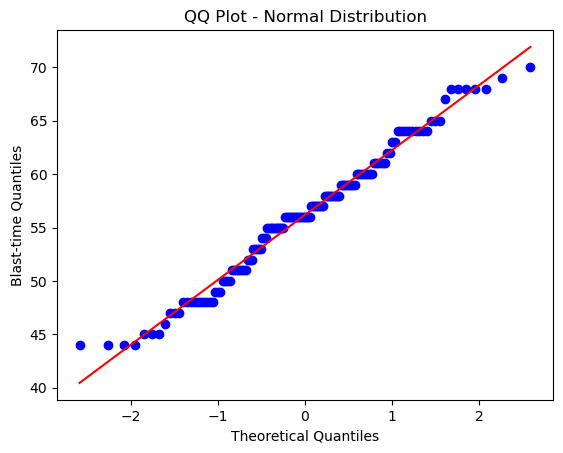

In [31]:
stats.probplot(peak_entries, dist="norm", plot=plt)
plt.title("QQ Plot - Normal Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Blast-time Quantiles")
plt.show()

From the QQ plot, we can conclude that blast trigger times follows normal distribution.
 Probability of open-pit blasting happening between 14:15 to 14:30 is around 25%

In [32]:
AQI_df = pd.DataFrame(AQI, columns=['AQI'])
AQI_df['Date-time']=df['From']
AQI_df = AQI_df[['Date-time','AQI']]
AQI_df['Date-time'] = pd.to_datetime(AQI_df['Date-time'])

#### Segmentation

In [33]:
before_blasting = df_interpolate[df_interpolate['From'].dt.time < pd.to_datetime('13:45').time()]
after_blasting = df_interpolate[df_interpolate['From'].dt.time > pd.to_datetime('14:45').time()]

In [34]:
#Calculate AQI mean of across all days
AQI_day_mean = []
for i in range(96):
    AQI_day_mean.append(np.mean(AQI[list(range(i,len(AQI),96))]))

In [35]:
start_time = datetime.strptime('00:00:00', '%H:%M:%S')
end_time = datetime.strptime('23:45:00', '%H:%M:%S')
gap = timedelta(minutes=15)
time = []

current_time = start_time
while current_time <= end_time:
    time.append(current_time.strftime('%H:%M:%S'))
    current_time += gap    

AQI_mean_df = pd.DataFrame(AQI_day_mean, columns=['AQI mean'])
AQI_mean_df['Time'] = time
AQI_mean_df = AQI_mean_df[['Time','AQI mean']]
AQI_mean_df.set_index('Time', inplace=True)
#AQI_mean_df['Date-time'] = pd.to_datetime(AQI_mean_df['Date-time'])

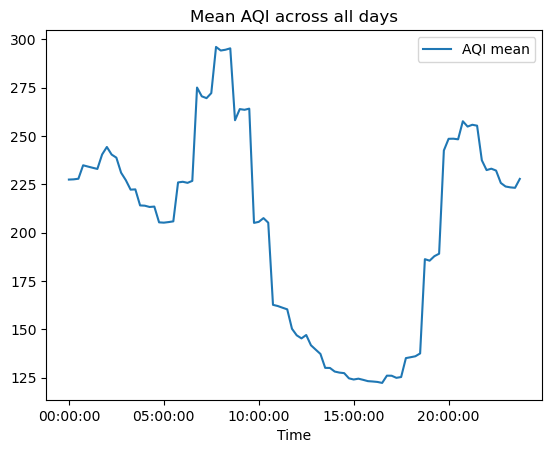

In [36]:
AQI_mean_df.plot()
plt.title("Mean AQI across all days")
plt.show()

In [37]:
#Time before blast
start_time = datetime.strptime('00:00:00', '%H:%M:%S')
end_time = datetime.strptime('13:30:00', '%H:%M:%S')
gap = timedelta(minutes=15)
time_before_blast = []

current_time = start_time
while current_time <= end_time:
    time_before_blast.append(current_time.strftime('%H:%M:%S'))
    current_time += gap

In [38]:
#Time after blast
start_time = datetime.strptime('14:45:00', '%H:%M:%S')
end_time = datetime.strptime('23:45:00', '%H:%M:%S')
gap = timedelta(minutes=15)
time_after_blast = []

current_time = start_time
while current_time <= end_time:
    time_after_blast.append(current_time.strftime('%H:%M:%S'))
    current_time += gap

In [39]:
df_before_blast = pd.DataFrame({'Date-time':time_before_blast, 'AQI mean':AQI_mean_df['AQI mean'][:len(time_before_blast)]})
df_after_blast = pd.DataFrame({'Date-time':time_after_blast, 'AQI mean':AQI_mean_df['AQI mean'][-len(time_after_blast):]})
df_before_blast.set_index('Date-time', inplace=True)
df_after_blast.set_index('Date-time', inplace=True)

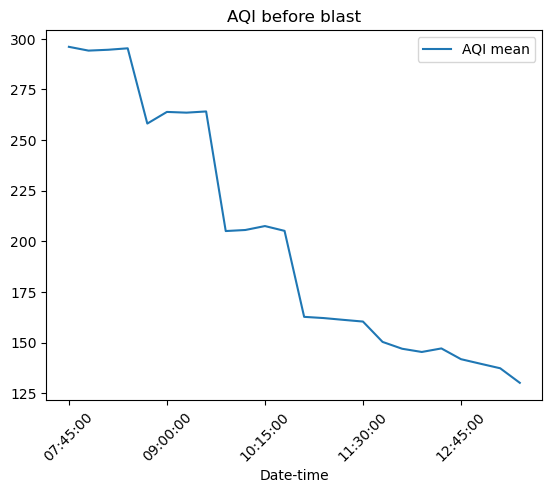

In [40]:
df_before_blast['07:45:00':].plot()
plt.title("AQI before blast")
plt.xticks(rotation=45)
plt.show()
#print("Mean before blast = ", np.mean(AQI[:len(time_before_blast)]))

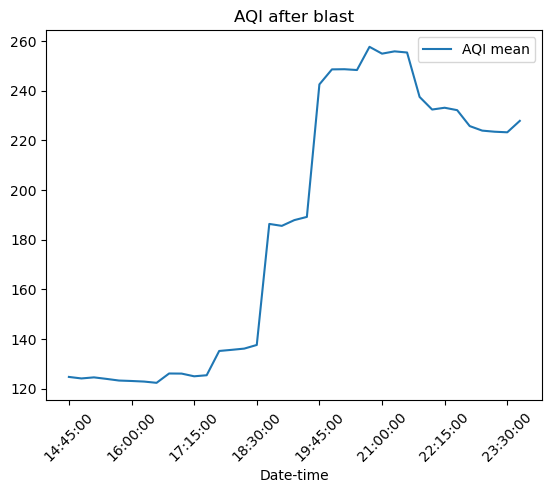

In [41]:
df_after_blast.plot()
plt.title("AQI after blast")
plt.xticks(rotation=45)
plt.show()
#print("Mean after blast = ", np.mean(AQI[-len(time_after_blast):]))

It can be observerd that overall AQI mean per day is decreasing before blasting time(13:45 to 14:45) and increasing after blasting time. This furthermore proves that the blasting time is indeed between 13:45 to 14:45.

#### Descriptive analysis


Measures of Central Tendency:
Mean: 201.6550111498851
Median: 218.15580376024363
Mode: 122.32937706852115

Measures of Dispersion or Variation:
Range: 173.6764694526374
Variance: 2711.7466105219605
Standard Deviation: 52.07443336726729

Measures of Position (Quartiles):
Lower Quartile: 144.4577107154289
Median Quartile: 218.15580376024363
Upper Quartile: 237.75787846286187


<AxesSubplot:title={'center':'Histogram of Mean AQI'}, ylabel='Frequency'>

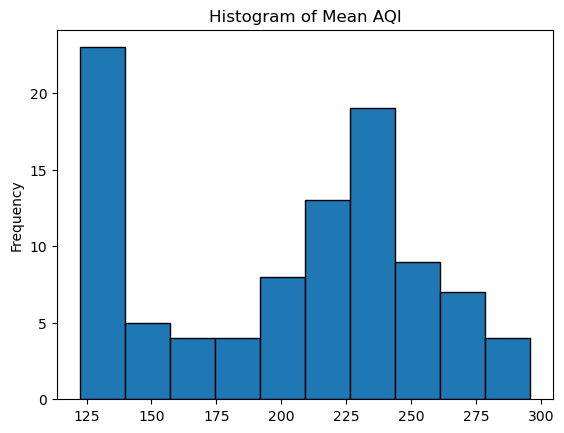

In [42]:
import pandas as pd
import numpy as np

# Measures of Frequency
frequency = AQI_mean_df['AQI mean'].value_counts()

# Measures of Central Tendency
mean = np.mean(AQI_mean_df['AQI mean'])
median = np.median(AQI_mean_df['AQI mean'])
mode = AQI_mean_df['AQI mean'].mode()[0]

# Measures of Dispersion or Variation
range_val = np.ptp(AQI_mean_df['AQI mean'])
variance = np.var(AQI_mean_df['AQI mean'])
std_dev = np.std(AQI_mean_df['AQI mean'])

# Measures of Position (Quartiles)
quartiles = np.percentile(AQI_mean_df['AQI mean'], [25, 50, 75])
lower_quartile = quartiles[0]
median_quartile = quartiles[1]
upper_quartile = quartiles[2]

# Print the calculated descriptive statistics
print("\nMeasures of Central Tendency:")
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("\nMeasures of Dispersion or Variation:")
print("Range:", range_val)
print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("\nMeasures of Position (Quartiles):")
print("Lower Quartile:", lower_quartile)
print("Median Quartile:", median_quartile)
print("Upper Quartile:", upper_quartile)

# Plotting a histogram to visualize the distribution
AQI_mean_df['AQI mean'].plot(kind='hist', bins=10, title='Histogram of Mean AQI',edgecolor='black')

#### Curve fitting

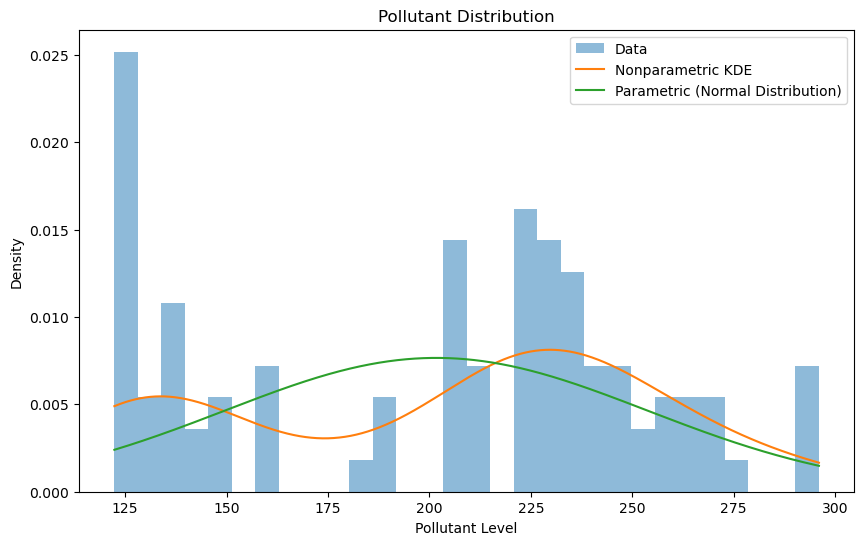

In [51]:
from scipy.stats import norm, kde

# Nonparametric Curve Fitting (Kernel Density Estimation)
density = kde.gaussian_kde(AQI_mean_df['AQI mean'])
x = np.linspace(AQI_mean_df['AQI mean'].min(), AQI_mean_df['AQI mean'].max(), num=1000)
y = density(x)

# Parametric Curve Fitting (Normal Distribution)
mean, std = norm.fit(AQI_mean_df['AQI mean'])
y_norm = norm.pdf(x, mean, std)

# Plot the original data and fitted curves
plt.figure(figsize=(10, 6))
plt.hist(AQI_mean_df['AQI mean'], bins=30, density=True, alpha=0.5, label='Data')
plt.plot(x, y, label='Nonparametric KDE')
plt.plot(x, y_norm, label='Parametric (Normal Distribution)')
plt.xlabel('Pollutant Level')
plt.ylabel('Density')
plt.title('Pollutant Distribution')
plt.legend()
plt.show()